<h1 style="color: #3636ff;">Линейная алгебра. Практическая работа №8</h1>

### Программные средства

[LaTeX. Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

[Sage. Linear Algebra](http://doc.sagemath.org/html/en/tutorial/tour_linalg.html)

[Numpy. Quickstart tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html#linear-algebra)

[R Functions - Tutorialspoint](https://www.tutorialspoint.com/r/r_functions.htm)

[Quick-R: User-Defined Functions](https://www.statmethods.net/management/userfunctions.html)

### Конспекты лекций

[АЛГЕБРА И ГЕОМЕТРИЯ ДЛЯ СТУДЕНТОВ-ФИЗИКОВ](http://math.phys.msu.ru/data/24/Algebra_and_geometry.pdf)

[Прямые и плоскости](http://hoster.bmstu.ru/~fn1/wp-content/uploads/2012/10/uchebno-metod/Surf_and_lines_ST_metod.pdf)

[Computational Mathematics with SageMath](http://dl.lateralis.org/public/sagebook/sagebook-ba6596d.pdf)

[Introduction to Symbolic Computation](http://homepages.math.uic.edu/~jan/mcs320/mcs320.pdf)

# Прямые

## 1. Уравнение прямой на плоскости.

Общий вид

$l: \ a * x + b * y + c = 0$

$\overrightarrow{n}\{a;b\} \perp l$

Проходящей через две точки $(x_1;y_1), (x_2;y_2)$

$\frac{x - x_1}{x_2 - x_1} = \frac{y - y_1}{y_2 - y_1}$

С угловым коэффициентом $k$ и проходящая через точку $(x_0;y_0)$

$y - y_0 = k * (x - x_0)$

$k = tg \ \alpha$ - тангенс угла наклона прямой к оси х.

$k = -\frac{a}{b} = \frac{y_2 - y_1}{x_2 - x_1}$

Параметрические

$\begin {cases} 
x = x_0 + p * t \\
y = y_0 + q * t
\end {cases}, t \in \mathbb{R}$

Каноническое

$\frac{x - x_0}{p} = \frac{y - y_0}{q}$

$\overrightarrow{l}\{p;q\} \parallel l, \ M_0(x_0;y_0) \in l$

В отрезках

$\frac{x}{\alpha} + \frac{y}{\beta} = 1$

$\alpha = -\frac{c}{a}, \beta = -\frac{c}{b}$

In [1]:
var('x,y,x0,y0,x1,y1,x2,y2,k,a,b,c,p,q,t')
eq=[a*x+b*y+c==0,
    y-y0==k*(x-x0),
    (y-y1)/(y2-y1)==(x-x1)/(x2-x1),
    x==x0+p*t,y==y0+q*t]

In [2]:
solutions=[solve([eq[0],a==3,b==-1,c==-1],a,b,c,x,y),
           solve([eq[1],k==-3,x0==1,y0==1],k,x0,y0,x,y),
           solve([eq[2],x1==-3,y1==-2,x2==-1,y2==4],
                 x1,y1,x2,y2,x,y),
           solve([eq[3],eq[4],x0==1,y0==-1,
                  p==2,q==-4],x0,y0,p,q,t,x,y)]
solutions

[[[a == 3, b == -1, c == -1, x == r1, y == 3*r1 - 1]],
 [[k == -3, x0 == 1, y0 == 1, x == r2, y == -3*r2 + 4]],
 [[x1 == -3, y1 == -2, x2 == -1, y2 == 4, x == r3, y == 3*r3 + 7]],
 [[x0 == 1, y0 == -1, p == 2, q == -4, t == r4, x == 2*r4 + 1, y == -4*r4 - 1]]]

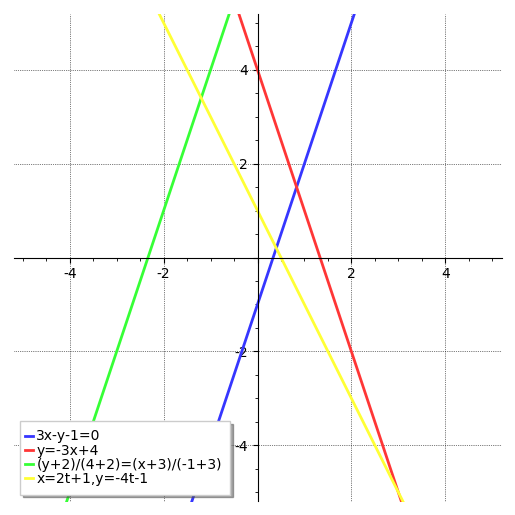

In [3]:
g=Graphics(); lines=[3*x-1,-3*x+4,3*x+7] 
colors=['#3636ff','#ff3636','#36ff36']
llabels=['3x-y-1=0','y=-3x+4','(y+2)/(4+2)=(x+3)/(-1+3)']
l123=sum([plot(lines[i],(x,-5,5),color=colors[i],thickness=2,
               legend_label=llabels[i]) for i in [0..2]])
l4=parametric_plot((2*t+1,-4*t-1),(t,-3,3),
                   thickness=2,color='#ffff36',
                   legend_label='x=2t+1,y=-4t-1')
g=g+l123+l4; g.set_legend_options(loc=3) 
g.show(xmax=5,xmin=-5,ymax=5,ymin=-5,
       gridlines=True,figsize=7)

In [5]:
import numpy,sympy,pylab
from mpl_toolkits.mplot3d import Axes3D
X=numpy.linspace(start=-10,stop=10,num=20)
T=numpy.linspace(start=-5,stop=5,num=20)
def line1(a,b,c,x): return -(a*x+c)/b
def line2(k,x0,y0,x): return k*(x-x0)+y0
def line3(x1,y1,x2,y2,x): 
    return (y2-y1)*(x-x1)/(x2-x1)+y1
def line4(x0,y0,p,q,t): return(x0+p*t,y0+q*t)
a,b,c,x,y,x0,y0,k,x1,y1,x2,y2,p,q,t=\
sympy.symbols('a b c x y x0 y0 k x1 y1 x2 y2 p q t')
eq=[a*x+b*y+c,y-y0-k*(x-x0),
    (y-y1)/(y2-y1)-(x-x1)/(x2-x1),
    x-x0-p*t,y-y0-q*t]

In [6]:
solutions=[sympy.solve([eq[0],a-3,b+1,c+1],a,b,c,y),
           sympy.solve([eq[1],x0-1,y0-1,k+3],x0,y0,k,y),
           sympy.solve([eq[2],x1+3,y1+2,x2+1,y2-4],
                       x1,y1,x2,y2,y),
           sympy.solve([eq[3],eq[4],x0-1,y0+1,p-2,q+4],
                       x0,y0,p,q,t,y)]
for i in range(4): display(solutions[i]); print('\n')

[(3, -1, -1, 3*x - 1)]

[(1, 1, -3, 4 - 3*x)]

[(-3, -2, -1, 4, 3*x + 7)]

[(1, -1, 2, -4, (x - 1)/2, 1 - 2*x)]

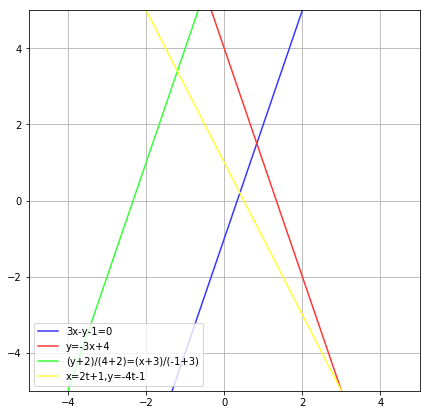

In [7]:
f,ax=pylab.subplots(1,figsize=(7,7))
ax.plot(X,line1(3,-1,-1,X),color='#3636ff',label='3x-y-1=0')
ax.plot(X,line2(-3,1,1,X),color='#ff3636',label='y=-3x+4')
ax.plot(X,line3(-3,-2,-1,4,X),color='#36ff36',
        label='(y+2)/(4+2)=(x+3)/(-1+3)')
ax.plot(line4(1,-1,2,-4,T)[0],line4(1,-1,2,-4,T)[1],
        color='#ffff36',label='x=2t+1,y=-4t-1')
ax.legend(loc=3); ax.set_xlim(-5,5); ax.set_ylim(-5,5)
pylab.grid(); pylab.show()

In [8]:
%%r
line1<-function(a,b,c,x){-(a*x+c)/b}
line2<-function(k,x0,y0,x){k*(x-x0)+y0}
line3<-function(x1,y1,x2,y2,x){(y2-y1)*(x-x1)/(x2-x1)+y1}
line4<-function(x0,y0,p,q,t){list(x0+p*t,y0+q*t)}
T<-X<-seq(from=-10,to=11,by=1)
library(grDevices); library(Matrix)

[1] "Matrix"    "tools"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"


In [ ]:
%%r
svg(filename="Rplots.svg",width=7,height=7,pointsize=12,
    onefile=TRUE,family="times",bg="white",
    antialias=c("default","none","gray","subpixel"))
cols<-c('#3636ff','#ff3636','#36ff36','#ffff36')
labs<-c('3x-y-1=0','y=-3x+4',
        '(y+2)/(4+2)=(x+3)/(-1+3)',
        'x=2t+1,y=-4t-1')
plot(X,line1(3,-1,-1,X),col=cols[1],type='l',lwd=3,
     xlim=c(-5,5),ylim=c(-5,5),ylab='Y')
lines(X,line2(-3,1,1,X),col=cols[2],lwd=3)
lines(X,line3(-3,-2,-1,4,X),col=cols[3],lwd=3) 
lines(line4(1,-2,-1,3,T)[[1]],
      line4(1,-2,-1,3,T)[[2]],col=cols[4],lwd=3)
legend(-4,-2,labs,col=cols,lwd=3); grid(); dev.off()

## 2. Взаимное расположение точек и прямых на плоскости.

Расстояние между прямой и точкой

$\begin {cases}
l: a * x + b * y + c = 0 \\
M: (x_0;y_0) 
\end {cases} \to \rho(M,l) = \frac{|a * x_0 + b * y_0 + c|}{\sqrt{a^2 + b^2}}$

Две прямые

$\begin {cases}
l_1: y = k_1 * x + m_1 = 0 \\
l_2: y = k_2 * x + m_2 = 0
\end {cases}$

$k_1 = k_2, m_1 = m_2 \implies l_1 \equiv l_2 $

$k_1 = k_2, m_1 \neq m_2 \implies l_1 \parallel l_2 $

$k_1 \neq k_2 \implies l_1 \cap l_2 = O $

$tg \ \varphi = \bigg|\frac{k_1 - k_2}{1 + k_1 \cdot k_2}\bigg| $

$k_1 \cdot k_2 = -1 \implies l_1 \perp l_2 \\ $

In [9]:
# l1:2x+3y-5=0, l2:-3x-4y+7=0
var('x,y')
solve([2*x+3*y-5==0,-3*x-4*y+7==0],x,y)

[[x == 1, y == 1]]

In [10]:
# l1:2x+3y-5=0, l2:-3x-4y+7=0
import numpy,sympy
x,y=sympy.symbols('x,y')
print(numpy.linalg.solve(numpy.matrix([[2,3],[-3,-4]]),
      numpy.matrix([5,-7]).T))
sympy.solve([2*x+3*y-5,-3*x-4*y+7],x,y)

[[1.]
 [1.]]


{x: 1, y: 1}

In [11]:
%%r
# l1:2x+3y-5=0, l2:-3x-4y+7=0
a<-matrix(data=c(2,3,-3,-4),nrow=2,ncol=2,byrow=T)    
b<-matrix(data=c(5,-7),nrow=2,ncol=1,byrow=F)
round(solve(a,b))

     [,1]
[1,]    1
[2,]    1


Пример типового расчета

In [12]:
%%html
<p style="color:slategray;">
$\mathscr{l_1: 11 * x + 2 * y - 7 = 0 \\ 
          l_2: 2 * x - y + 3 = 0 \\
m_1, m_2: \rho(M,l_1) = \rho(M,l_2),\; 
\forall M \in m_1, m_2 \\ m_1, m_2: \; ?}$</p>
<p style="color:darkblue;">
$\mathbb{\rho(M,l_1) = \rho(M,l_2) \iff 
\frac{|11 * x + 2 * y - 7|}{\sqrt{11^2 + 2^2}} = 
\frac{|2 * x - y + 3|}{\sqrt{2^2 + (-1)^2}}}$</p>

In [14]:
var('x,y')
eq_m1=(11*x+2*y-7)/sqrt(11^2+2^2)==\
(2*x-y+3)/sqrt(2^2+(-1)^2)
eq_m2=(11*x+2*y-7)/sqrt(11^2+2^2)==\
-(2*x-y+3)/sqrt(2^2+(-1)^2)
solve(eq_m1,y),solve(eq_m2,y)

([y == -1/7*x + 22/7], [y == 7*x + 8/3])

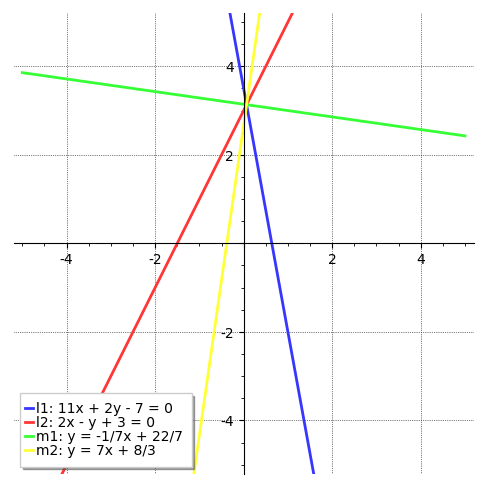

In [16]:
g=Graphics()
lines=[-11/2*x+7/2,2*x+3,-1/7*x+22/7,7*x+8/3]
colors=['#3636ff','#ff3636','#36ff36','#ffff36']
llabels=['l1: 11x + 2y - 7 = 0','l2: 2x - y + 3 = 0',
         'm1: y = -1/7x + 22/7','m2: y = 7x + 8/3']
g+=sum([plot(lines[i],(x,-5,5),color=colors[i],
             thickness=2,legend_label=llabels[i]) 
        for i in [0..3]])
g.set_legend_options(loc=3) 
g.show(xmax=5,xmin=-5,ymax=5,ymin=-5,
gridlines=True,figsize=(5,5))

In [17]:
# l1:a1*x+b1*y+c1=0, l2:a2*x+b2*y+c2=0
import pylab,sympy
x,y=sympy.symbols('x,y')
a1,b1,c1,a2,b2,c2=11,2,-7,2,-1,3
eq_m1=(a1*x+b1*y+c1)/sympy.sqrt(a1^2+b1^2)-\
      (a2*x+b2*y+c2)/sympy.sqrt(a2^2+b2^2)
eq_m2=(a1*x+b1*y+c1)/sympy.sqrt(a1^2+b1^2)+\
      (a2*x+b2*y+c2)/sympy.sqrt(a2^2+b2^2)
sympy.solve(eq_m1,y),sympy.solve(eq_m2,y)

([22/7 - x/7], [7*x + 8/3])

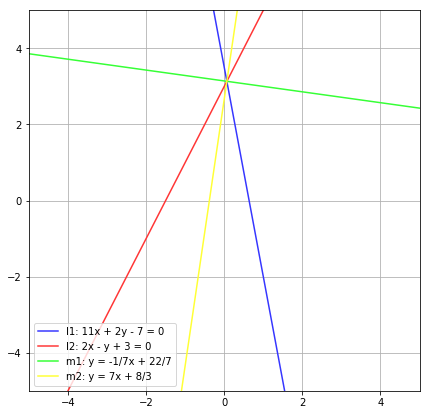

In [18]:
f,ax=pylab.subplots(1,figsize=(7,7))
lines=[-11/2*X+7/2,2*X+3,-1/7*X+22/7,7*X+8/3]
colors=['#3636ff','#ff3636','#36ff36','#ffff36']
llabels=['l1: 11x + 2y - 7 = 0','l2: 2x - y + 3 = 0',
         'm1: y = -1/7x + 22/7','m2: y = 7x + 8/3']
for i in range(4):
    ax.plot(X,lines[i],color=colors[i],label=llabels[i])
ax.legend(loc=3); ax.set_xlim(-5,5); ax.set_ylim(-5,5)
pylab.grid(); pylab.show()

In [19]:
%%r
X<-seq(from=-10,to=11,by=1); vl1<-c(11,2,-7); vl2<-c(2,-1,3)
vm1<-vl1/sqrt(vl1[1]^2+vl1[2]^2)-vl2/sqrt(vl2[1]^2+vl2[2]^2)
vm2<-vl1/sqrt(vl1[1]^2+vl1[2]^2)+vl2/sqrt(vl2[1]^2+vl2[2]^2)
l1<-function(x){-(vl1[1]*x+vl1[3])/vl1[2]}
l2<-function(x){-(vl2[1]*x+vl2[3])/vl2[2]}
m1<-function(x){-(vm1[1]*x+vm1[3])/vm1[2]}
m2<-function(x){-(vm2[1]*x+vm2[3])/vm2[2]}
lines<-matrix(c(l1(X),l2(X),m1(X),m2(X)),
              ncol=22,nrow=4,byrow=T); dim(lines)

[1]  4 22


In [ ]:
%%r
svg(filename="Rplots.svg",width=7,height=7,pointsize=12,
    onefile=TRUE,family="times",bg="white",
    antialias=c("default","none","gray","subpixel"))
cols<-c('#3636ff','#ff3636','#36ff36','#ffff36')
labs<-c('l1: 11x + 2y - 7 = 0','l2: 2x - y + 3 = 0',
        'm1: y = -1/7x + 22/7','m2: y = 7x + 8/3')
plot(X,lines[1,],col=cols[1],type='l',lwd=3,
     xlim=c(-5,5),ylim=c(-5,5),ylab='Y')
for (i in 2:4) {lines(X,lines[i,],col=cols[i],lwd=3)}
legend(-4,-2,labs,col=cols,lwd=3); grid(); dev.off()

## 3. Прямые в пространстве.

Общие уравнения (пересечение плоскостей)

$l: \begin {cases}
a_1x + b_1y + c_1z + d_1 = 0 \\
a_2x + b_2y + c_2z + d_2 = 0
\end {cases}$

$\overrightarrow{n}\{a;b;c\} \perp l$

Проходящей через две точки $(x_1;y_1;z_1), (x_2;y_2;z_2)$

$\frac{x - x_1}{x_2 - x_1} = \frac{y - y_1}{y_2 - y_1} = \frac{z - z_1}{z_2 - z_1}$

Параметрические

$\begin {cases} 
x = x_0 + p * t \\
y = y_0 + q * t \\
z = z_0 + r * t
\end {cases}, t \in \mathbb{R}$

Канонические

$\frac{x - x_0}{p} = \frac{y - y_0}{q} = \frac{z - z_0}{r}$

$\overrightarrow{l}\{p;q;r\} \parallel l, \ M_0(x_0;y_0;z_0) \in l$

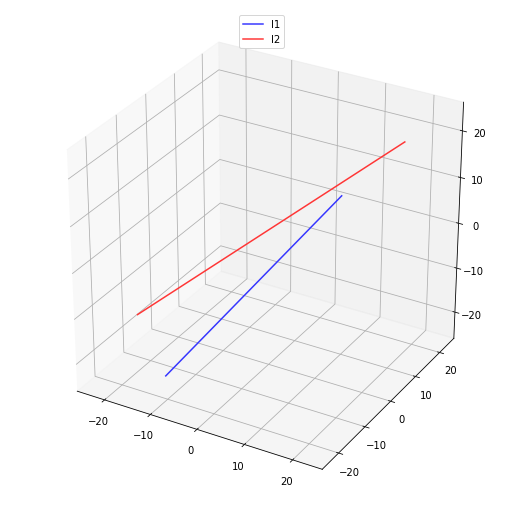

In [29]:
import numpy,pylab
from mpl_toolkits.mplot3d import Axes3D
X=numpy.linspace(start=-10,stop=10,num=20)
T=numpy.linspace(start=-20,stop=20,num=20)
def line3D1(x1,y1,z1,x2,y2,z2,x): 
    return ((y2-y1)*(x-x1)/(x2-x1)+y1,
            (z2-z1)*(x-x1)/(x2-x1)+z1)
def line3D2(x0,y0,z0,p,q,r,t): 
    return(x0+p*t,y0+q*t,z0+r*t)
f=pylab.figure(figsize=(9,9))
ax=f.add_subplot(111,projection='3d')
ax.plot(X,line3D1(3,-1,-1,5,2,2,X)[0],
        line3D1(3,-1,-1,5,2,2,X)[1],
        color='#3636ff',label='l1')
ax.plot(line3D2(-3,1,1,2,-1,2,T)[0],
        line3D2(-3,1,1,2,-1,2,T)[1],
        line3D2(-3,1,1,2,-1,2,T)[2],
        color='#ff3636',label='l2')
ax.set_xlim(-25,25); ax.set_ylim(-25,25)
ax.set_zlim(-25,25); ax.legend(loc=9)
pylab.show()

In [30]:
%%r
line3D1<-function(x1,y1,z1,x2,y2,z2,x)
    {list((y2-y1)*(x-x1)/(x2-x1)+y1,
          (z2-z1)*(x-x1)/(x2-x1)+z1)}
line3D2<-function(x0,y0,z0,p,q,r,t)
    {list(x0+p*t,y0+q*t,z0+r*t)}
T<-seq(from=-1,to=1,by=0.1)
line3D2(3,-1,-4,5,2,3,T)

[[1]]
 [1] -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
[16]  5.5  6.0  6.5  7.0  7.5  8.0

[[2]]
 [1] -3.0 -2.8 -2.6 -2.4 -2.2 -2.0 -1.8 -1.6 -1.4 -1.2 -1.0 -0.8 -0.6 -0.4 -0.2
[16]  0.0  0.2  0.4  0.6  0.8  1.0

[[3]]
 [1] -7.0 -6.7 -6.4 -6.1 -5.8 -5.5 -5.2 -4.9 -4.6 -4.3 -4.0 -3.7 -3.4 -3.1 -2.8
[16] -2.5 -2.2 -1.9 -1.6 -1.3 -1.0


Пример типового расчета

In [31]:
%%html
<p style="color:slategray;">
$\mathscr{A(2;5;3), B(3;2;1), C(4;1;2) \in \pi \\ 
D(1;4;4), E(0;6;7)\in l \\ O(x;y;z) = 
\pi \cap l \\ (x;y;z) = ?}$</p>

In [32]:
var('x,y,z,t')
xA,yA,zA,xB,yB,zB,xC,yC,zC,xD,yD,zD,xE,yE,zE=\
2,5,3,3,2,1,4,1,2,1,4,4,0,6,7
Pi=Matrix(SR,3,[x-xA,y-yA,z-zA,
                xB-xA,yB-yA,zB-zA,
                xC-xA,yC-yA,zC-zA]).det()==0
l=[x==xD+(xE-xD)*t,y==yD+(yE-yD)*t,z==zD+(zE-zD)*t]
solve([Pi,l[0],l[1],l[2]],x,y,z,t)

[[x == 3, y == 0, z == -2, t == -2]]

In [33]:
import sympy
x,y,z,t=sympy.symbols('x,y,z,t')
xA,yA,zA,xB,yB,zB,xC,yC,zC,xD,yD,zD,xE,yE,zE=\
2,5,3,3,2,1,4,1,2,1,4,4,0,6,7
Pi=sympy.Matrix([[x-xA,y-yA,z-zA],
                 [xB-xA,yB-yA,zB-zA],
                 [xC-xA,yC-yA,zC-zA]]).det()
l=[x-xD-(xE-xD)*t,y-yD-(yE-yD)*t,z-zD-(zE-zD)*t]
sympy.solve([Pi,l[0],l[1],l[2]],x,y,z,t)

{t: -2, x: 3, y: 0, z: -2}

## 4. Взаимное расположение точек и прямых в пространстве.

Расстояние между прямой $l: \frac{x - x_0}{p} = \frac{y - y_0}{q} = \frac{z - z_0}{r}$ и точкой $M(x_1;y_1;z_1)$

$\Delta_x = \begin {vmatrix} q & r \\ y_1-y_0 & z_1-z_0 \end {vmatrix}, \
\Delta_y = \begin {vmatrix} p & r \\ x_1-x_0 & z_1-z_0 \end {vmatrix}, \
\Delta_z = \begin {vmatrix} p & q \\ x_1-x_0 & y_1-y_0 \end {vmatrix} \\
\rho(M,l) = \frac{\sqrt{\Delta_x^2 + \Delta_y^2 + \Delta_z^2}}{\sqrt{p^2 + q^2 + r^2}}$ 

Две прямые

$l_1: \frac{x - x_1}{p_1} = \frac{y - y_1}{q_1} = \frac{z - z_1}{r_1} $

$A_1(x_1;y_1;z_1) \in l_1, \ \overrightarrow{s_1}\{p_1;q_1;r_1\} \parallel l_1 $

$l_2: \frac{x - x_2}{p_2} = \frac{y - y_2}{q_2} = \frac{z - z_2}{r_2} $

$A_2(x_2;y_2;z_2) \in l_2, \ \overrightarrow{s_2}\{p_2;q_2;r_2\} \parallel l_2$

$\overrightarrow{A_1A_2} = k_1 * \overrightarrow{s_1} = k_2 * \overrightarrow{s_2} \ 
(\overrightarrow{A_1A_2} \parallel \overrightarrow{s_1} \parallel \overrightarrow{s_2}) 
\implies l_1 \equiv l_2 $

$\overrightarrow{A_1A_2} \neq k_1 * \overrightarrow{s_1} = k_2 * \overrightarrow{s_2} \ 
(\overrightarrow{A_1A_2} \nparallel \overrightarrow{s_1} \parallel \overrightarrow{s_2}) 
\implies l_1 \parallel l_2 $

$\begin{vmatrix}
x_2-x_1 & y_2-y_1 & z_2-z_1 \\
p_1 & q_1 & r_1 \\
p_2 & q_2 & r_2
\end {vmatrix} = 0, \ \overrightarrow{s_1} \neq k * \overrightarrow{s_2} 
\implies l_1 \cap l_2 = O $

$\begin{vmatrix}
x_2-x_1 & y_2-y_1 & z_2-z_1 \\
p_1 & q_1 & r_1 \\
p_2 & q_2 & r_2
\end {vmatrix} \neq 0
\implies l_1, l_2 \notin \pi$

Расстояние между скрещивающимися прямыми

$\Delta = \begin{vmatrix}
x_2-x_1 & y_2-y_1 & z_2-z_1 \\ p_1 & q_1 & r_1 \\ p_2 & q_2 & r_2
\end {vmatrix}, \
\Delta_x = \begin {vmatrix} q_1 & r_1 \\ q_2 & r_2 \end {vmatrix}, \
\Delta_y = \begin {vmatrix} p_1 & r_1 \\ p_2 & r_2 \end {vmatrix}, \
\Delta_z = \begin {vmatrix} p_1 & q_1 \\ p_2 & q_2 \end {vmatrix}$

$\rho(l_1,l_2) = \frac{|\Delta|}{\sqrt{\Delta_x^2 + \Delta_y^2 + \Delta_z^2}}$

Расстояние между параллельными прямыми равно расстоянию 

от любой точки на первой прямой $A_1(x_1;y_1;z_1) \in l_1$ до второй прямой $l_2$

Угол между прямыми

$cos \angle (l_1, l_2) = \frac{p_1p_2 + q_1q_2 + r_1r_2}{\sqrt{p_1^2 + q_1^2 + r_1^2}\sqrt{p_2^2 + q_2^2 + r_2^2}}$

In [34]:
import numpy
x1,y1,z1,x2,y2,z2=2,5,3,3,2,1 # A1∈l1,A2∈l2
p1,q1,r1,p2,q2,r2=4,1,2,1,4,4 # s1||l1,s2||l2
detD=numpy.linalg.det(numpy.matrix([[x2-x1,y2-y1,z2-z1],
                                    [p1,q1,r1],[p2,q2,r2]])) # Δ
detDx=numpy.linalg.det(numpy.matrix([[q1,r1],[q2,r2]])) # Δx
detDy=numpy.linalg.det(numpy.matrix([[p1,r1],[p2,r2]])) # Δy
detDz=numpy.linalg.det(numpy.matrix([[p1,q1],[p2,q2]])) # Δz
round(abs(detD)/(detDx**2+detDy**2+detDz**2)**0.5,2) # ρ(l1,l2)

0.38

In [35]:
%%r
A1<-c(2,5,3); A2<-c(3,2,1) # A1∈l1,A2∈l2
s1<-c(4,1,2); s2<-c(1,4,4) # s1||l1,s2||l2
D<-matrix(c(A2-A1,s1,s2),ncol=3,byrow=T) # Δ
Dx<-matrix(c(s1[2],s1[3],s2[2],s2[3]),ncol=2,byrow=T) # Δx
Dy<-matrix(c(s1[1],s1[3],s2[1],s2[3]),ncol=2,byrow=T) # Δy
Dz<-matrix(c(s1[1],s1[2],s2[1],s2[2]),ncol=2,byrow=T) # Δz
round(abs(det(D))/(det(Dx)^2+det(Dy)^2+det(Dz)^2)^0.5,2) # ρ(l1,l2)

[1] 0.38


In [36]:
%%html
<p style="color:slategray;">
$\mathscr{l_1 : \frac{x - 4}{-3} = \frac{y - 2}{-1} = \frac{z + 1}{1} \\ 
l_2 : \frac{x + 1}{2} = \frac{y - 5}{3} = \frac{z - 10}{4} \\
l_1 \cap l_2 = O (x_0;y_0;z_0) \\ 
l_1, \ l_2 \in \pi \\ (x_0;y_0;z_0) = \ ?, \ \pi: \ ?}$</p>

In [37]:
var('x,y,z,t,i,j,k')
x1,y1,z1,x2,y2,z2=4,2,-1,-1,5,10 # A1∈l1,A2∈l2
p1,q1,r1,p2,q2,r2=-3,-1,1,2,3,4 # s1||l1,s2||l2
l1=[(x-x1)/p1==(y-y1)/q1,(z-z1)/r1==(y-y1)/q1]
l2=[(x-x2)/p2==(y-y2)/q2,(z-z2)/r2==(y-y2)/q2]
O=solve([l1[0],l1[1],l2[0],l2[1]],x,y,z) # O=l1∩l2, O∈π
xO,yO,zO=O[0][0].rhs(),O[0][1].rhs(),O[0][2].rhs()
n=Matrix(SR,3,[i,j,k,p1,q1,r1,p2,q2,r2]).det() # n=s1xs2, n⊥π
[nx,ny,nz]=map(lambda w: w.subs(i=1,j=1,k=1),n.operands())
Pi=(nx*(x-xO)+ny*(y-yO)+nz*(z-zO)==0)/(-7)
[xO,yO,zO],Pi # O,π

([-5, -1, 2], x - 2*y + z + 1 == 0)

In [38]:
import sympy
x,y,z,t,i,j,k=sympy.symbols('x,y,z,t,i,j,k')
x1,y1,z1,x2,y2,z2=4,2,-1,-1,5,10 # A1∈l1,A2∈l2
p1,q1,r1,p2,q2,r2=-3,-1,1,2,3,4 # s1||l1,s2||l2
l1=[(x-x1)/p1-(y-y1)/q1,(z-z1)/r1-(y-y1)/q1]
l2=[(x-x2)/p2-(y-y2)/q2,(z-z2)/r2-(y-y2)/q2]
O=sympy.solve([l1[0],l1[1],l2[0],l2[1]],x,y,z) # O=l1∩l2, O∈π
n=sympy.Matrix([[i,j,k],[p1,q1,r1],[p2,q2,r2]]).det() # n=s1xs2, n⊥π
Pi=(n.coeff(i)*(x-O[x])+n.coeff(j)*(y-O[y])+n.coeff(i)*(z-O[z]))/(-7)
'%s; '%str((O[x],O[y],O[z]))+'%s = 0'%str(Pi) # O,π

'(-5, -1, 2); x - 2*y + z + 1 = 0'

## 5. Задание

Задать канонические уравнения прямой и общее уравнение плоскости так,

чтобы прямая была параллельна указанной плоскости.

Найти расстояние между ними, используя SageMath, Python, R.